In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=224, mask_size=224, is_deeplab=False)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, 
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
for l in model.base_layers:
    for param in l.parameters():
        param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:0


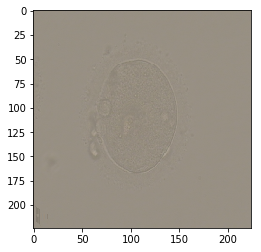

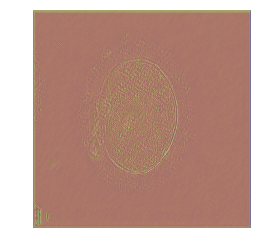

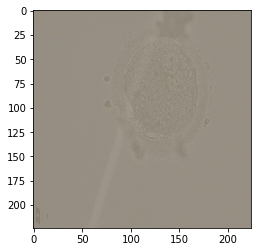

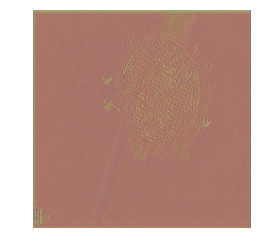

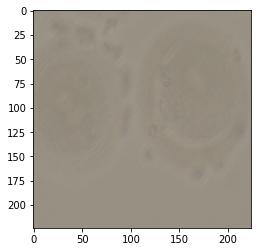

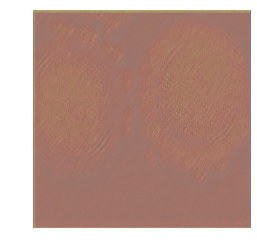

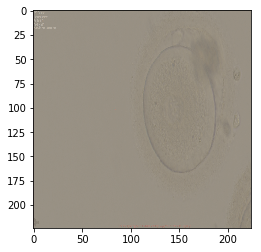

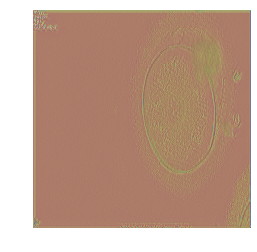

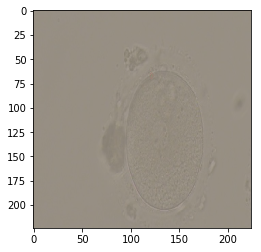

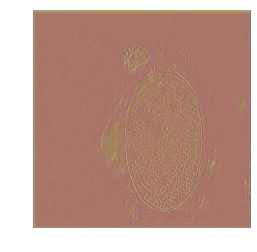

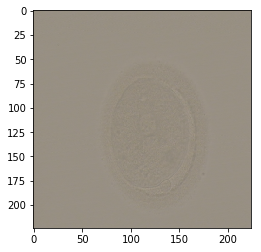

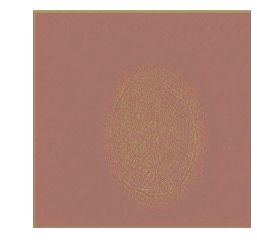

In [6]:
visualize_segmenter(model, dataloaders['val'], device)

In [7]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=30)

Epoch 0/29
----------
LR 0.001
train: iou: 0.632848, aed: 6.215385, bce: 0.249706, dice: 0.178282, loss: 0.213994
val: iou: 0.812401, aed: 0.231760, bce: 0.088555, dice: 0.077348, loss: 0.082951
saving best model
0m 50s
Epoch 1/29
----------
LR 0.001
train: iou: 0.844696, aed: 0.173077, bce: 0.077762, dice: 0.065624, loss: 0.071693
val: iou: 0.855025, aed: 0.201717, bce: 0.066869, dice: 0.064223, loss: 0.065546
saving best model
0m 51s
Epoch 2/29
----------
LR 0.001
train: iou: 0.865969, aed: 0.196154, bce: 0.065232, dice: 0.056224, loss: 0.060728
val: iou: 0.869327, aed: 0.197425, bce: 0.061862, dice: 0.053981, loss: 0.057921
saving best model
0m 51s
Epoch 3/29
----------
LR 0.001
train: iou: 0.877996, aed: 0.175000, bce: 0.059744, dice: 0.050375, loss: 0.055060
val: iou: 0.851040, aed: 0.291845, bce: 0.071375, dice: 0.059645, loss: 0.065510
0m 51s
Epoch 4/29
----------
LR 0.001
train: iou: 0.880030, aed: 0.201923, bce: 0.061433, dice: 0.049977, loss: 0.055705
val: iou: 0.857167, aed:

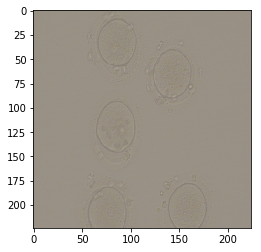

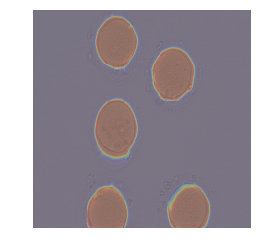

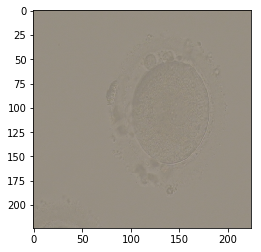

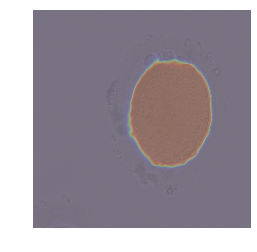

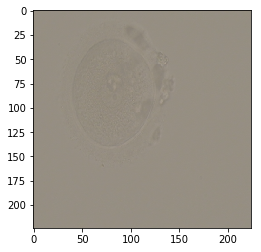

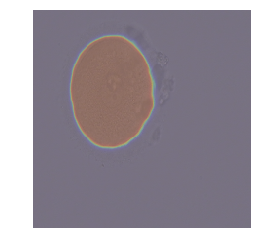

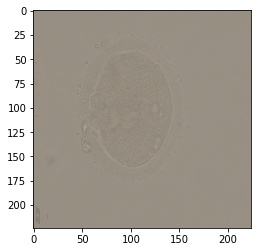

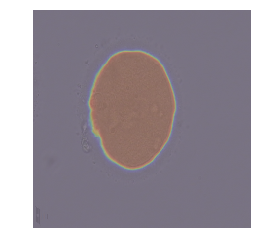

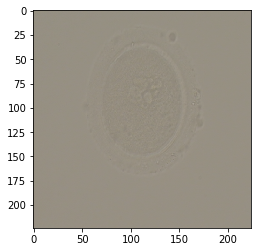

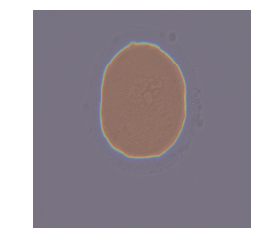

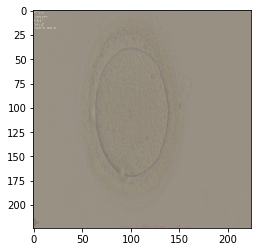

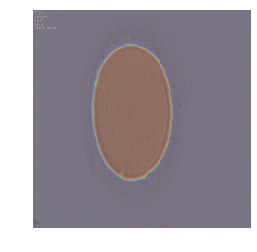

In [8]:
visualize_segmenter(model, dataloaders['val'], device)

In [9]:
results = score_segmenter(model, dataloaders, device)
print(results)

(0.8926593034001625, 0.24034334763948498)


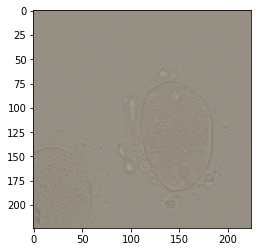

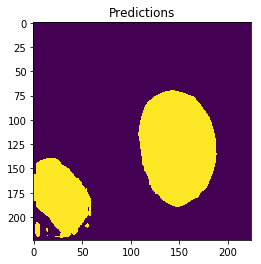

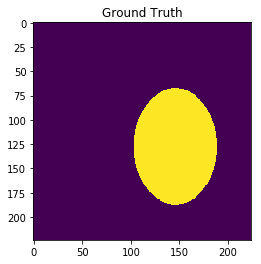

Really have 1 but predicted 6


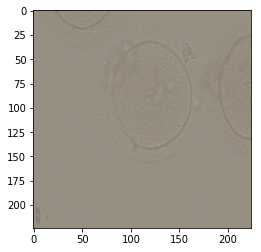

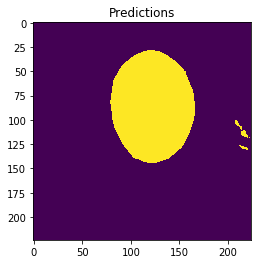

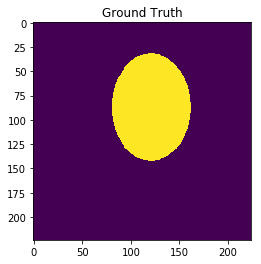

Really have 1 but predicted 5


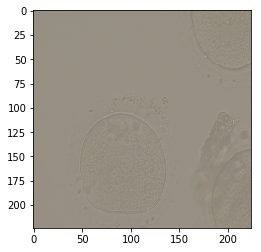

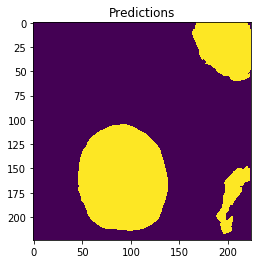

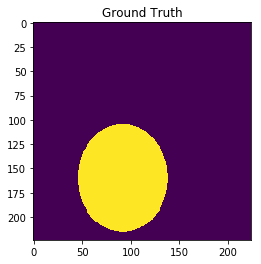

Really have 1 but predicted 3


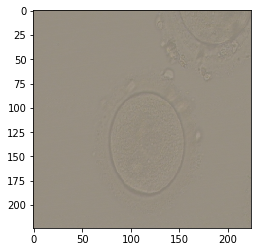

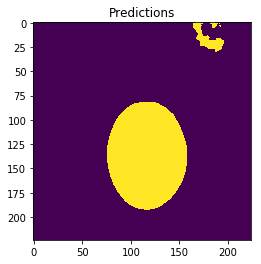

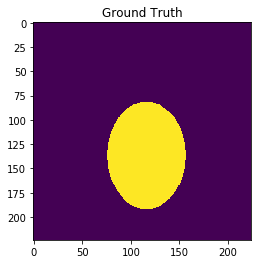

Really have 1 but predicted 5


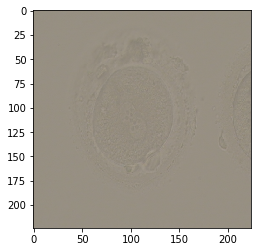

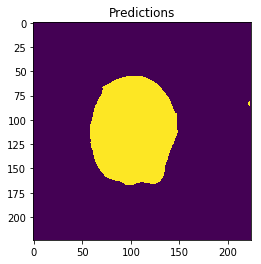

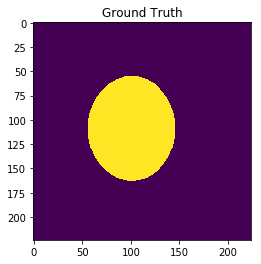

Really have 1 but predicted 2


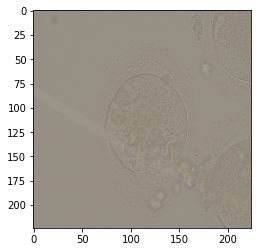

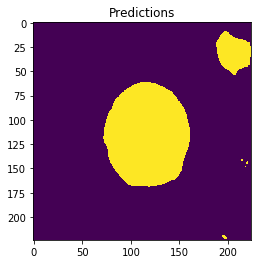

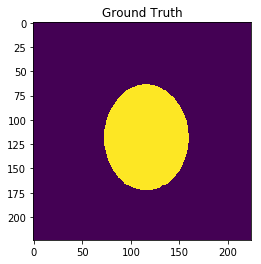

Really have 1 but predicted 6


In [10]:
visualize_counting_errors(model, dataloaders['val'], device)